# Predicting F1 Score for Drinking


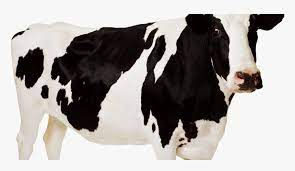

In [110]:
COw=Image("download.png",)
COw


**We are building a model for `Cow` activities which can predict F1 score  above 80%. ** 

In [101]:
#Importing tool we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
%matplotlib inline


#Model evluation 
from sklearn.model_selection import train_test_split , cross_val_score

In [4]:
d2=pd.read_csv("D2_train.csv")

In [5]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54439 entries, 0 to 54438
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    54439 non-null  int64  
 1   acc_x   54439 non-null  float64
 2   acc_y   54439 non-null  float64
 3   acc_z   54439 non-null  float64
 4   gyr_x   54439 non-null  float64
 5   gyr_y   54439 non-null  float64
 6   gyr_z   54439 non-null  float64
 7   mag_x   54439 non-null  float64
 8   mag_y   54439 non-null  float64
 9   mag_z   54439 non-null  float64
 10  label   54439 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 4.6 MB


In [6]:
d2.head()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,1628079761,-0.187012,1.071289,0.321289,7.934570,-40.527344,17.028809,-526.5,1437.0,513.0,2
1,1628079761,-0.137207,1.099121,0.294922,0.305176,-44.677734,15.930176,-528.0,1423.5,495.0,2
2,1628079761,0.028320,1.053711,0.215820,-9.216309,-42.541504,10.681152,-510.0,1419.0,484.5,2
3,1628079761,0.151856,0.960938,0.206543,-15.502930,-31.433105,4.943848,-529.5,1428.0,496.5,2
4,1628079761,0.171387,0.883301,0.247070,-0.061035,-27.832031,-2.685547,-526.5,1420.5,505.5,2


In [9]:
##Viewing feature variables & Data Analysis
d2.label.value_counts()

2    54439
Name: label, dtype: int64

In [12]:
d2.isna().sum()

time     0
acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
label    0
dtype: int64

In [13]:
d2.describe()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
count,5.443900e+04,54439.000000,54439.000000,54439.000000,54439.000000,54439.000000,54439.000000,54439.000000,54439.000000,54439.000000,54439.0
mean,1.628194e+09,-0.080071,0.688848,0.169730,0.846126,-2.055915,-0.677698,-204.810687,530.212789,159.630485,2.0
std,9.713158e+04,0.307579,0.609802,0.132971,6.526951,11.560896,6.492925,222.727130,565.884673,483.991502,0.0
min,1.628079e+09,-1.018555,-1.359863,-0.952637,-98.083496,-258.728027,-152.221680,-775.500000,-355.500000,-886.500000,2.0
25%,1.628124e+09,-0.252930,0.838379,0.107910,-1.525879,-4.943848,-2.563477,-324.000000,4.500000,-345.000000,2.0
50%,1.628166e+09,-0.127441,0.933594,0.171387,0.854492,-2.014160,-0.671387,-211.500000,640.500000,349.500000,2.0
75%,1.628252e+09,0.142090,0.963867,0.261719,3.112793,1.159668,1.220703,-18.000000,835.500000,498.000000,2.0
max,1.628400e+09,1.488770,1.865723,5.983398,147.460938,380.004883,157.714844,168.000000,1498.500000,852.000000,2.0


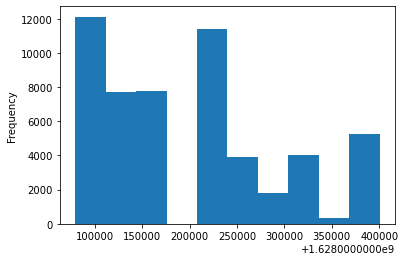

In [18]:
d2["time"].plot.hist();

In [22]:
d2.corr()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
time,1.000000,0.256811,0.068853,-0.378580,-0.027247,-0.028181,-0.025370,-0.206664,0.183603,0.196322,NaN
acc_x,0.256811,1.000000,-0.135038,0.011197,-0.065777,0.032644,0.022999,-0.509343,0.133706,0.268030,NaN
acc_y,0.068853,-0.135038,1.000000,-0.215527,0.000887,0.004718,0.000419,0.065785,0.044235,0.251206,NaN
acc_z,-0.378580,0.011197,-0.215527,1.000000,-0.004675,-0.006845,0.008129,-0.159903,-0.202634,0.097816,NaN
gyr_x,-0.027247,-0.065777,0.000887,-0.004675,1.000000,-0.101733,-0.024195,0.068246,-0.007802,-0.071916,NaN
gyr_y,-0.028181,0.032644,0.004718,-0.006845,-0.101733,1.000000,0.036361,-0.052816,0.055389,0.057964,NaN
gyr_z,-0.025370,0.022999,0.000419,0.008129,-0.024195,0.036361,1.000000,-0.017571,-0.027115,0.024008,NaN
mag_x,-0.206664,-0.509343,0.065785,-0.159903,0.068246,-0.052816,-0.017571,1.000000,-0.451124,-0.703898,NaN
mag_y,0.183603,0.133706,0.044235,-0.202634,-0.007802,0.055389,-0.027115,-0.451124,1.000000,0.112827,NaN
mag_z,0.196322,0.268030,0.251206,0.097816,-0.071916,0.057964,0.024008,-0.703898,0.112827,1.000000,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'time'),
  Text(1, 0, 'acc_x'),
  Text(2, 0, 'acc_y'),
  Text(3, 0, 'acc_z'),
  Text(4, 0, 'gyr_x'),
  Text(5, 0, 'gyr_y'),
  Text(6, 0, 'gyr_z'),
  Text(7, 0, 'mag_x'),
  Text(8, 0, 'mag_y'),
  Text(9, 0, 'mag_z'),
  Text(10, 0, 'label')])

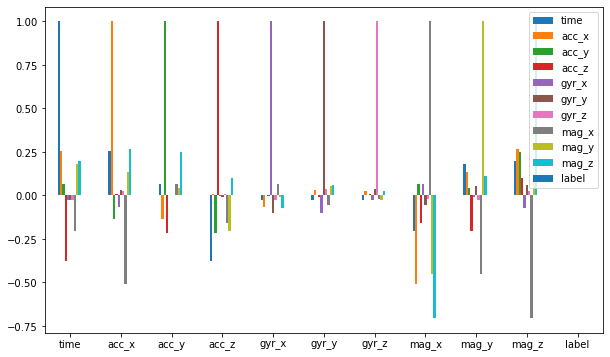

In [23]:
d2.corr().plot(kind="bar",
               figsize=(10,6))
plt.xticks(rotation=0)

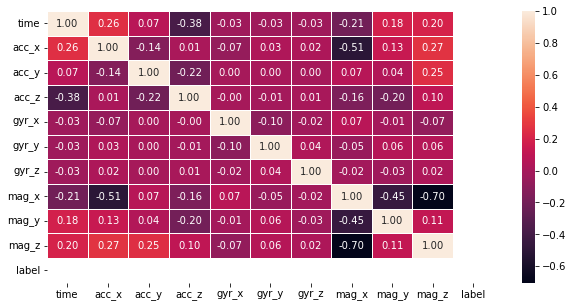

In [31]:
corr_matrix=d2.corr()
fig,ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f")

In [34]:
#Creating X & y labels
X = d2.drop("label",axis=1)
y = d2["label"]

# Spliting the data into training and testing 
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2)

In [36]:
X_train

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
50024,1628124189,-0.432129,0.791016,0.213379,39.123535,-64.819336,-0.915527,-201.0,660.0,358.5
23029,1628165802,-0.166016,0.907227,0.162109,-9.094238,19.226074,-8.728027,112.5,610.5,-586.5
27033,1628210058,-0.248535,-0.994629,0.226074,1.037598,-1.647949,0.122070,6.0,157.5,-780.0
46655,1628124121,-0.605469,0.758301,0.349609,28.808594,-2.197266,8.117676,-186.0,631.5,456.0
34649,1628251189,0.109863,0.970703,0.203125,1.403809,-6.530762,-0.549316,-237.0,-267.0,525.0
...,...,...,...,...,...,...,...,...,...,...
42365,1628211366,-0.077148,0.978516,0.038574,-2.746582,9.216309,-7.690430,-58.5,-15.0,370.5
27118,1628210060,-0.231934,-1.040527,0.229981,-6.774902,-14.648438,-6.103516,3.0,144.0,-808.5
46683,1628124121,-0.607422,0.730469,0.396484,-0.610352,-3.784180,5.371094,-205.5,663.0,511.5
27751,1628296037,-0.297852,-0.997559,0.071777,-0.366211,-4.211426,-3.234863,40.5,133.5,-723.0


In [37]:
# Importing models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [40]:
#Putting all models into dict
models= {
        "KNM": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

# Creating a function to fit and score models
def fit_and_score(models , X_train, X_test ,y_train , y_test):
    """
    """
    #Random seed
    np.random.seed(23)
    
    #Creating a dic to keep model scores
    model_scores = {}
    
    #Looping through models
    for name, model in models.items():
        #Fiting the model to the data
        model.fit(X_train,y_train)
        
        #Evaluating the models and append its score to model_scores
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [53]:
clf= KNeighborsClassifier()


np.random.seed(23)

clf.fit(X_train,y_train)

KNeighborsClassifier()

In [54]:
clf.score(X_train,y_train)


1.0

In [55]:
clf.score(X_test, y_test)

1.0

In [41]:
model_scores=fit_and_score(models=models,
                          X_train=X_train,
                          X_test=X_test,
                          y_train=y_train,
                          y_test=y_test)


In [42]:
model_scores

{'KNM': 1.0, 'Random Forest': 1.0}

`Model Comparision`

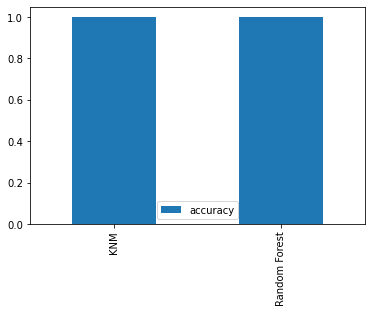

In [45]:
mod_com = pd.DataFrame(model_scores , index=["accuracy"])
mod_com.T.plot.bar();

In [46]:
#Importing f1 score 
from sklearn.metrics import f1_score

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00     10888

    accuracy                           1.00     10888
   macro avg       1.00      1.00      1.00     10888
weighted avg       1.00      1.00      1.00     10888



In [61]:
y_preds = clf.predict(X_test)

In [62]:
y_preds

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [98]:
#Importing Randomforest classifier
clf_2 = RandomForestClassifier()


#Spliting data into train and split
X_train ,X_test ,y_train ,y_test = train_test_split( X, y , test_size=0.2)

#Fitting model into model 
clf_2.fit(X_train, y_train)




RandomForestClassifier()

In [76]:
clf_2

1.0

In [100]:
#Calculating f1 score
f1=f1_score(y_test,y_preds, average='weighted')
f1

1.0